          6            5         4           3         2
0.002949 x - 0.001442 x - 0.117 x + 0.04072 x + 1.369 x - 0.1232 x - 2.194


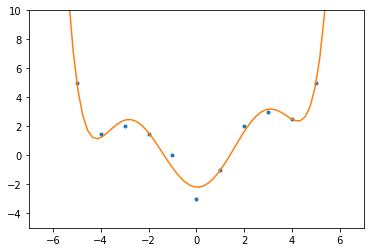

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Data (for polynomial creation)
x = np.array([-5.0,  -4.0,  -3.0,  -2.0,  -1.0,   0.0,   1.0,   2.0,   3.0,   4.0,    5.0])
y = np.array([ 5.0,   1.5,   2.0,   1.5,   0.0,  -3.0,  -1.0,   2.0,   3.0,   2.5,    5.0])

#Polynomial creation (6 dimensions)
p = np.poly1d(np.polyfit(x, y, 6))
print(p)

#View data and polynomials
xp = np.linspace(-10, 10, 100)
plt.plot(x, y, '.', xp, p(xp), '')
plt.xlim(-7, 7)
plt.ylim(-5, 10)
plt.show()

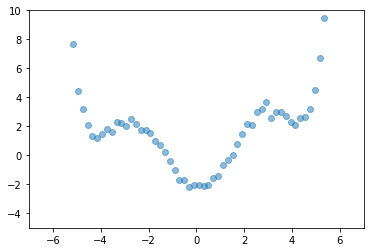

In [2]:
#Create 100 points of data from polynomial (0 to 0).Add 2 random numbers)
x_add, y_add =[], []
for i in np.linspace(-10, 10, 100):
    x_add.append(i)
    y_add.append( p(i) + np.random.normal(0, 0.2)) 

#Display the created data
plt.scatter(x_add, y_add, alpha=0.5)
plt.xlim(-7, 7)
plt.ylim(-5, 10)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from matplotlib import pylab
from matplotlib import animation, rc

#Setting
rc('animation', html='jshtml')
w = np.array([-2.])

#Random sampling function (sampling 100 to 10 points)
def random_sampling():
    X_train, X_test, y_train, y_test = train_test_split(x_add, y_add, test_size=0.90)
    _x = X_train
    _y = y_train 
    return _x, _y

#1 screen creation function
def animate(frame, w, alpha):    
    _x, _y = random_sampling()
    p = np.poly1d(np.polyfit(_x, _y, 6))
    plt.plot(_x, _y, '.',
             xp, p(xp), '')
    d_y = p.deriv()
    
    plt.clf()
    plt.plot(xp, p(xp), '-', color='green')
    plt.plot(w, p(w), '.', color='red', markersize=20)
    plt.xlim(-7, 7)
    plt.ylim(-5, 10)  
    
    grad = d_y(w)
    w -= alpha * grad

#Animation creation function
def gradient_descent(alpha, w):
    fig, ax = plt.subplots(111)
    if type(w) is list:
        w = np.array(w, detype=np.float32)
    anim = animation.FuncAnimation(fig, animate, fargs=(w, alpha), frames=100, interval=300) 
    
    return anim

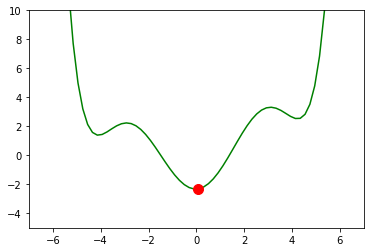

In [4]:
#Learning rate 0.3, initial value of weight 3.Run in 5
gradient_descent(alpha=0.3, w=np.array([3.5]))